# Assignment 3: Confidence Intervals & The Bootstrap

### Instructions

This assignment is much like the last.

* This assignment includes some tests to help you make sure that your implementation is correct.  When you see a cell with `assert` commands, these are tests.

* Once you have completed the assignment, delete the cells which have these `assert` commands.  You will not need them.

* When you are done and have answered all the questions, convert this notebook to a .py file using `File > Download as > Python (.py)`.  Name your submission `assignment3.py` and submit it to OWL.

Failure to comply may resilt in you not earning full marks for your assignment.  We want you to earn full marks!  Please follow these instructions carefully.

# Question 1

### Part A

Recall from theclture that a $199(1-\alpha)\%$ confidence interval for the mean is 

$$ \bar{x} \pm  t_{1-\alpha/2, n-1} \dfrac{\hat{\sigma}}{\sqrt{n}} $$

Where $ t_{1-\alpha/2, n-1}$ is the appropiorate quantile of a Student's t distribution with $n-1$ degrees of freedom.  When $\alpha = 0.05$ and when $n$ is big enough, $ t_{1-\alpha/2, n-1} \approx 1.96$.  

Write a function called `confidence_interval` which takes as it's argument an array of data called `data` and returns two things:

* An estimated mean of `data`, and 

* The lower and upper bounds of the 95% confidence interval for the mean of `data`.  Ensure these are returned in a numpy array of shape (2,)

In [2]:
#It's dangerous to go alone.  Take these
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import pandas as pd


def confidence_interval(data):
    '''
    Function to compute confidence interval (ci).
    
    Inputs:
    data - ndarray.  Data to be used to compute the interval
    
    Outputs:
    estimated_mean - float.  The mean of the data
    bounds - array. An array of length 2 where bounds[0] is the lower bound and bounds[1] is the upper bound for the ci.
    '''
    ### BEGIN SOLUTION

    ### END SOLUTION
    
    return estimated_mean, bounds

### Tests

Tests are to make sure you've implemented the solution correctly.  If these tests pass without any `AsserstionError`'s, then you can be confident that you've implemented the solution as expected.

Once you're happy with your implementation, delete the cell below.

In [2]:
#Ensure confidence_interval returns two objets
test_data = np.array([-1,0,1])

#Do you return two objects?
assert len(confidence_interval(test_data))==2

#Is the first a float and the second an array?
obj_1, obj_2 = confidence_interval(test_data)
assert isinstance(obj_1, np.float)
assert isinstance(obj_2, np.ndarray)

#Did you compute the mean correctly?
assert obj_1==0

#Did you use the appropriate degrees of freedom?
test_ci = np.array([-2.028, 2.028])
np.testing.assert_array_almost_equal(obj_2, test_ci, decimal = 3)

### Part B

The "95% confidence interval" is named so because the long term relative frequency of these estimtors containing the true estimand is 95%.  That is to say **if I construct 95% confidence intervals for the sample mean again and again from the same data generating mechanism, 95% of the intervals I construct will contain the population mean**.

Write a function called `ci_simulation` that runs some simulations to show this is the case.  From a standard normal distirbution, sample 25 observations and construct a confidence interval.  Do this 20 times and plot the intervals using `matplotlib.pyplot.errorbar`. Save your plot under the name `ci_simulation.png`.  Color the bar red if the confidence interval does not caputre the true mean and blue if it does.  If you are unfamilliar with `matplotlib.pyplot.errorbar`, I highly suggest reading Matplotlib's excellent documentation.

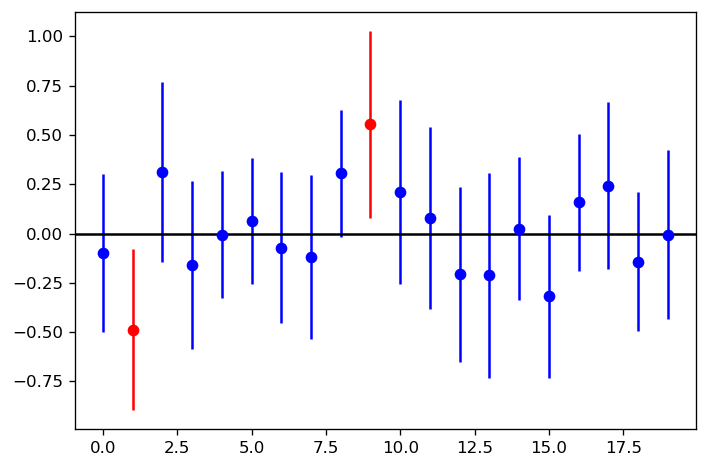

In [3]:

def ci_simulation():
    # Reporducibility.  Do not change this!
    np.random.seed(3)
    
    # Create the figure.
    fig, ax = plt.subplots(dpi = 120)

    # If the interval crosses this line, it should be blue, else red.
    ax.axhline(0, color = 'k')
    
    ### BEGIN SOLUTION


    ### END SOLUTION
    # This function does not have to return anything
    return None

ci_simulation()

### Part C

If you haven't changed the random seed from 3 and if you implemented the solution correctly, you should two red intervals.

Answer the following below in 1-2 sentences:

1) How many red intervals did we expect to see?  What is your justifiation for this?

2) If there is a discrepency between the number of observed and expected red intervals, what explains this difference?


### Part D

How many samples would we need in order to ensure that our constructed confidence interval is approximately 0.1 units long? 

Write a function called `num_propper_length` which takes as its only argument an integer `n`.  `num_propper_length` should simulate 1000 datasets of length `n`, compute confidence intervals for those datasets, compute the lengths of those intervals, and then returns the number of intervals which are no longer than 0.1 units.

Determine how many samples you need (that is, compute `n`).  Set this as your default argument for `n` in `num_propper_length`.

In [4]:
def num_propper_length(n=1600):
    '''
    Function to simulate how many confidence intervals would be no longer than 0.1 units long if
    we sampled n observatiosn from a standard normal.
    
    Inputs:
        n - int.  Number of draws to make from the standard normal
        
    Outputs:
        prop_long_enough - float (between 0 and 1).  Proportion of consutrcuted intervals which are no longer than 0.1.
    '''
    # For reproducibility.  Don't change this!
    np.random.seed(0)
    
    ### BEGIN SOLUTION

      
    ### END SOLUTION
    return prop_long_enough

### Tests

Tests are to make sure you've implemented the solution correctly.  If these tests pass without any `AsserstionError`'s, then you can be confident that you've implemented the solution as expected.

Once you're happy with your implementation, delete the cell below.

In [5]:
assert num_propper_length()==891

num_propper_length(n = 2000)

1000

### Part E
If you chose the right `n`, you should find that 891 (or approximately 89%) of your intervals are longer than 0.1.  

Why is this?  Answer below in 1-2 sentences.


---

## Question 2

### Part A
The dataset `hockey_stats.csv` contains information about information about hockey draftees.  We'll use this data to investigate the relationship between height and age on weight.  Load it into python using pandas.

Load in the `hockey_draftees_train.csv` data into pandas.  Fit a linear model of weight (`wt`) explained by height (`ht`) and age(`age`).  Call your fitted model `model`.

In [6]:
### BEGIN SOLUTION



### END SOLUTION

### Part B

Print out the R-squared for this model


In [7]:


print('Training rsquared is ',model.rsquared)



Training rsquared is  0.31407479140429084


### Part C

Now, let's see how well our model performs out of sample.  Load in the `hockey_draftees_test.csv` file into a dataframe.  Use your `model` to make predictions, and print the r-squared on the out of sample (oos) data.

In [8]:
### BEGIN SOLUTION


### END SOLUTION

print('Out of sample rsquared is ', rsquared_oos)


Out of sample rsquared is  0.3313198566514667


### Part D

A point estimate of the rsquared is nice, but what we really want is uncertainty estimates.  For that, we need a confidence interval.  To estimate how uncertain we are in our out of sample r-squared, let's use the bootstrap.

Write a function called `bootstrap` which takes three arguments:

* `data`, which is a dataframe, and 
* `model` which is an statsmodel ols model. `data` should look the the data `model` was trained on so that we can use `model` to make predictions on `data`.
* `numboot` which is an integer denoting how many bootstrap replications to perform.

Write `bootstrap` to perform bootstrap resampling for the out of sample r-squared.  You can use `pd.DataFrame.sample` with `replace = True` to perform the resampling.

`bootstrap` should return a numpy array of bootstraped rsquared values.



In [9]:
def bootstrap(data, model, numboot):
    '''
    Function to bootstrap the r-squared for a linear model
    
    Inputs:
        data - dataframe.  Data on which model can predict.
        model - statsmodel ols.  Linear model of weight explained by height and age.  Can predict on data.
        numboot - int.  Number of bootstrap replications.
    
    Outputs:
        bootstrapped_rsquared - array.  An array of size (numboot, ) which contains oos bootstrapped rsquared values.
    
    '''
    ### BEGIN SOLUTION

    ### END SOLUTION

    return bootstrapped_rsquared


### Part E

Use your `bootstrap` function to plot 10,000 bootstrap replicates as a histogram.

(array([1.000e+00, 8.000e+00, 8.600e+01, 4.310e+02, 1.425e+03, 2.835e+03,
        2.937e+03, 1.721e+03, 4.910e+02, 6.500e+01]),
 array([0.21458464, 0.23368726, 0.25278988, 0.2718925 , 0.29099512,
        0.31009774, 0.32920036, 0.34830298, 0.3674056 , 0.38650822,
        0.40561083]),
 <a list of 10 Patch objects>)

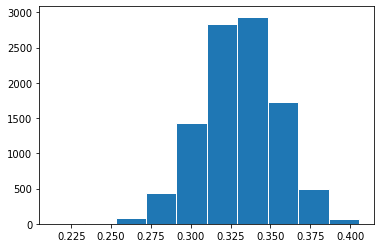

In [12]:
### BEGIN SOLUTION

### END SOLUTION

### Part F

Use your bootstrap replicates to estimates to obtain a bootstrapped 95% confidence interval.  Call the upper confidence bound `ci_upper` and the lower confidence bound `ci_lower`.

In [11]:
### BEGIN SOLUTIOn



### END SOLUTION

print('My confidence interval is between', ci_lower, ' and ', ci_upper)

My confidence interval is between 0.28066634803737944  and  0.37642936140774985
